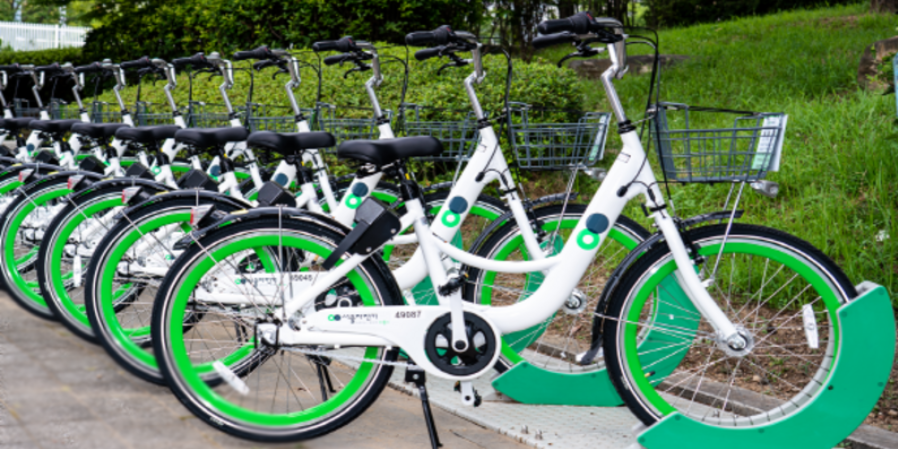

In [3]:
image_path = "Bike.png"
display(Image(filename=image_path))

### Title of ML project: "Rental Bike Count Prediction Model"
-----

### Name: Ramesh Krishnan

### Organization: Entri Elevate

### Date: 04-01-2025
-----

### Overview of Problem Statement:
Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike
available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city
with a stable supply of rental bikes becomes a major concern. Therefore, developing an effective prediction of bike count
required at each hour for the stable supply of rental bikes. 

### Objective:
To predict the count of bike required at each hour for the stable supply of rental bikes.

### Data Description:
#### Source: 
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

#### Dataset features:

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - % (percent)
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius 
* Solar radiation - MJ/m2 (megajoules per square meter)
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Data Collection:

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image, display
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib


In [2]:
# Load Data

file = 'SeoulBikeData.csv'
data = pd.read_csv(file, encoding='latin1') # read file using 'latin1' encoding

Data for one year from 01-12-2017 to 30-11-2018 

Latin-1 encoding: Latin-1 encoding (also known as ISO-8859-1) is a character encoding standard that represents characters from Western European languages. Text data might be encoded in Latin-1, especially if it originates from legacy systems or certain regions. Machine learning models require text to be properly encoded and tokenized.

In [3]:
# Convert to DataFrame

df = pd.DataFrame(data)

DataFrame: DataFrame is a data structure commonly used for handling and analyzing structured data. A DataFrame is conceptually 
similar to a table in a relational database or an Excel spreadsheet, where data is organized into rows and columns.

In [4]:
df.shape

(8760, 14)

In [4]:
# List the top 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Data Preprocessing - Data Cleaning:

Data Preprocessing: Data Preprocessing involves preparing raw data for modeling. It ensures that the data is clean, consistent, 
and suitable for the algorithm to learn effectively. 

In [5]:
# Convert 'Date' column to datetime format for better analysis

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # Invalid dates are converted to NaT

# Extract year, month, day, and day of the week

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

In [6]:
# Display the updated DataFrame

print(df[['Date', 'Year', 'Month', 'Day', 'Day_of_Week']].head())

        Date  Year  Month  Day  Day_of_Week
0 2017-12-01  2017     12    1            4
1 2017-12-01  2017     12    1            4
2 2017-12-01  2017     12    1            4
3 2017-12-01  2017     12    1            4
4 2017-12-01  2017     12    1            4


In [7]:
# Drop Date column from the data

df.drop(columns=['Date'],inplace=True)
print('Dataframe after removing date column permanantly\n')
df.head(5)

Dataframe after removing date column permanantly



,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_of_Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


In [8]:
# Columns in the dataset

df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day', 'Day_of_Week'],
      dtype='object')

#### Handle missing values:

In [9]:
# Understanding the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int32

In [10]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Day_of_Week
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,6.526027,15.720548,3.002740
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,3.448048,8.796749,1.998056
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000,16.000000,3.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,10.000000,23.000000,5.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000,31.000000,6.000000


In [11]:
df.shape

(8760, 17)

In [12]:
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Month                        0
Day                          0
Day_of_Week                  0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
# There is no NULL values or Duplicates in the data

In [15]:
# Check for and remove outliers in numerical columns

Outliers: Outliers are data points that deviate significantly from the majority of the data. They can arise due to errors, variability, or rare events. Identifying and handling outliers is crucial because they can distort statistical summaries and negatively impact model performance.

In [16]:
# Splitting categorical and numerical columns
# Numerical columns

numerical_columns = df.select_dtypes(include=['number'])
numerical_columns.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Day_of_Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,12,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,12,1,4


In [17]:
# Categorical columns

categorical_columns = df.select_dtypes(include=['object']) 
categorical_columns.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


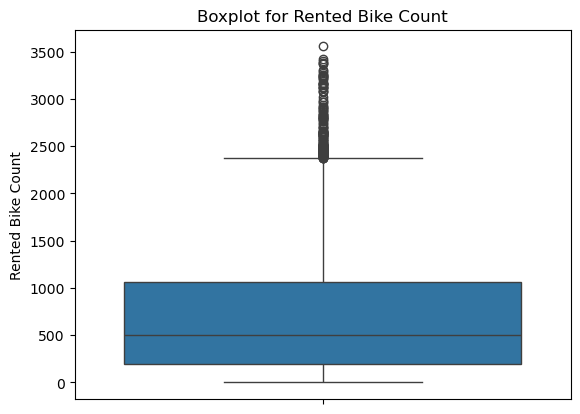

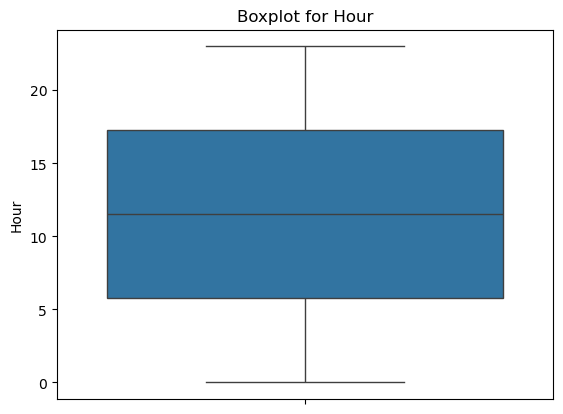

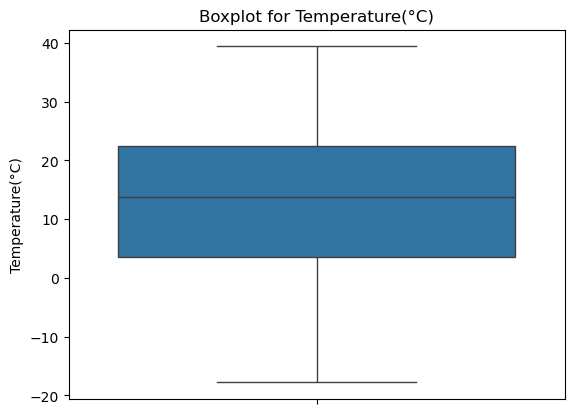

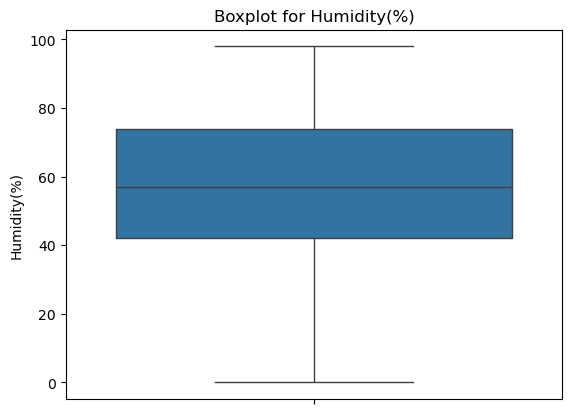

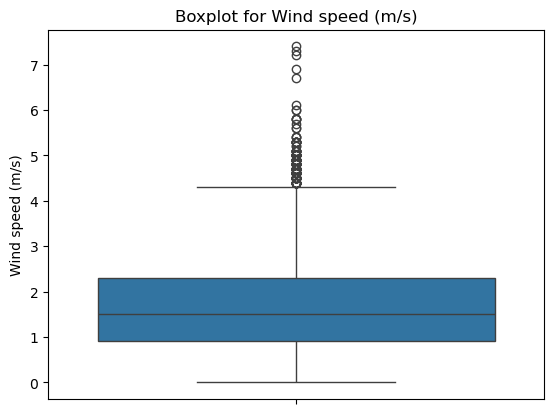

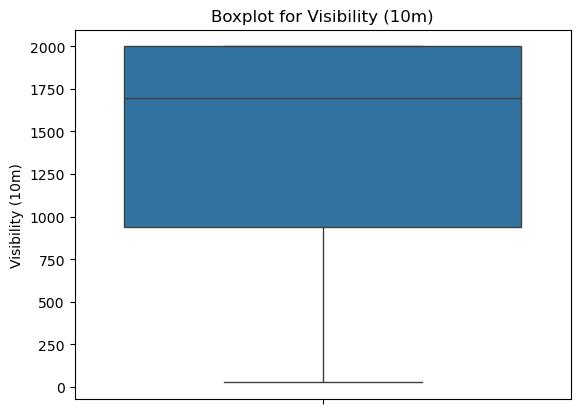

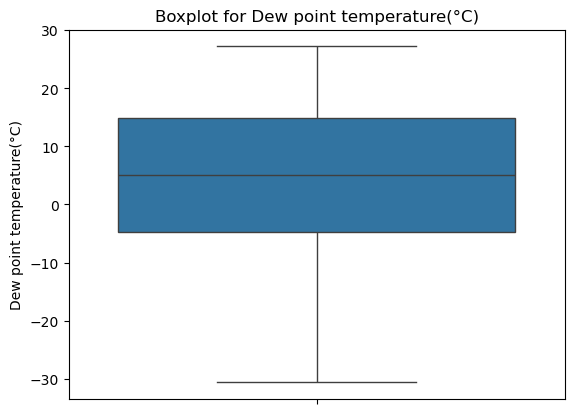

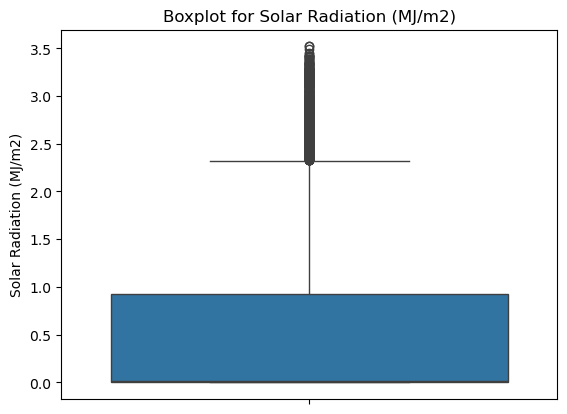

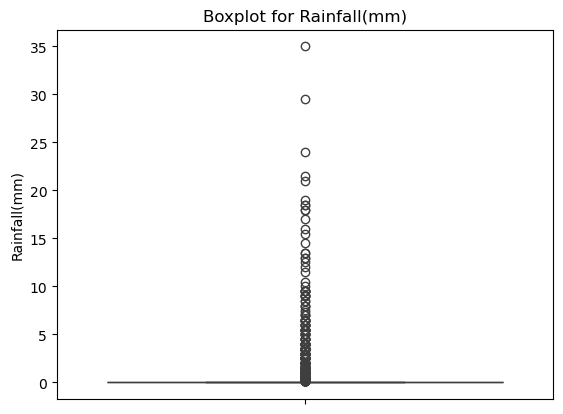

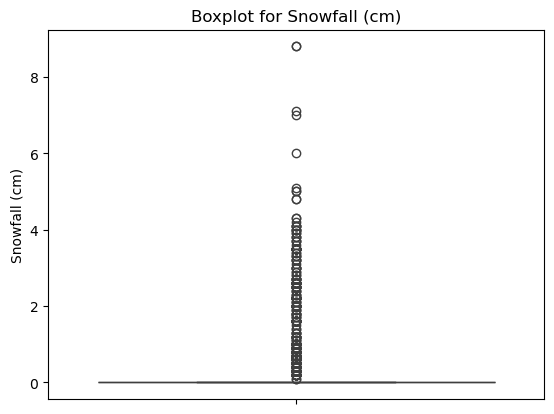

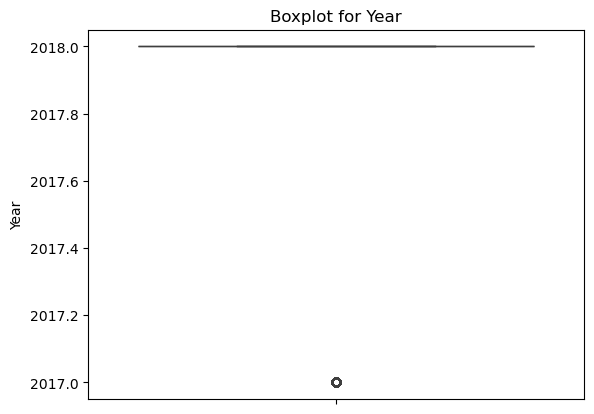

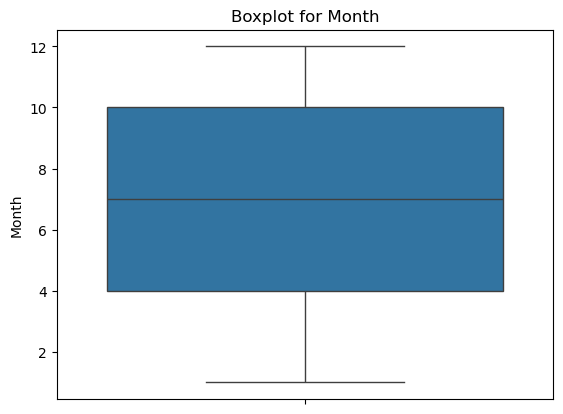

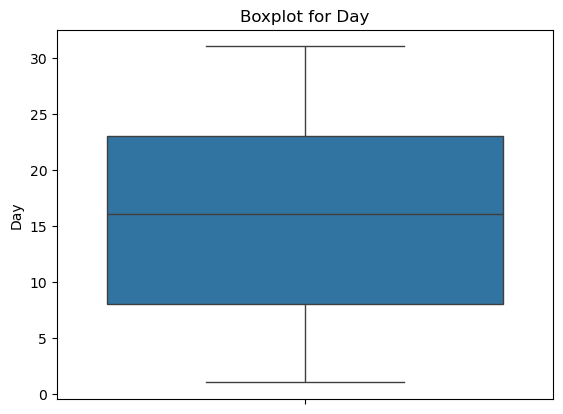

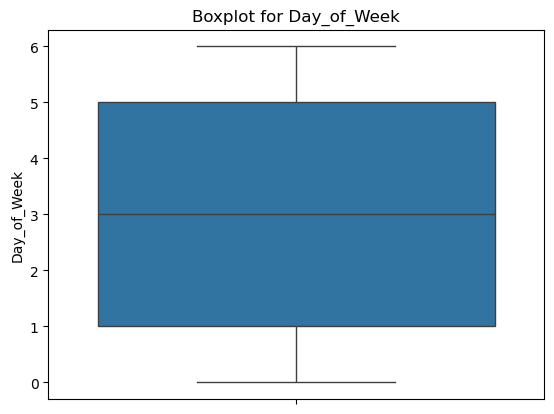

In [18]:
# Check for and remove outliers using statistical methods.
# Boxplot for numerical columns to visualize outliers.

for col in numerical_columns:
    plt.figure()
    sns.boxplot(numerical_columns[col])
    plt.title(f"Boxplot for {col}")

In [19]:
# for col in numerical_columns.columns:
    # plt.figure()
    # numerical_columns.boxplot(column=col)
    # plt.title(f"Boxplot for {col}") 

<Axes: ylabel='Rented Bike Count'>

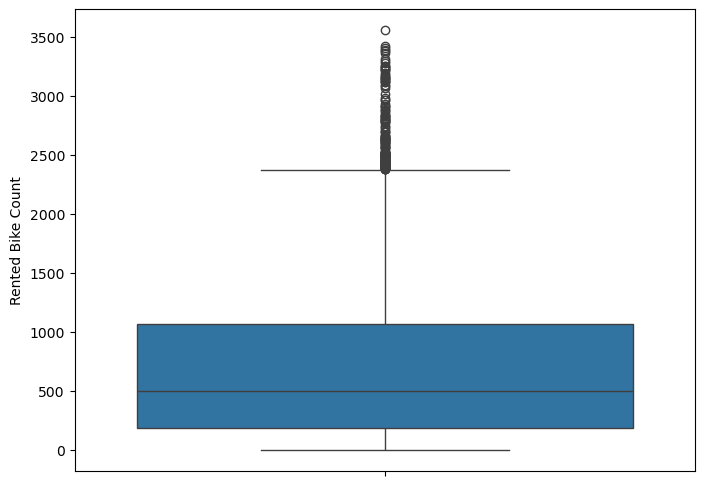

In [20]:
# Check outliers for Rented Bike Count alone

plt.figure(figsize=(8,6))
sns.boxplot(df['Rented Bike Count'])

In [21]:
# Define function for handling outlier using IQR

def handle_outliers_iqr(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        
        lower=Q1-(1.5*IQR)
        upper=Q3+(1.5*IQR)
        
        # Cap the outliers using capping (Winsorizing)
        
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
        
        # Applies a function to each value (x) in the column col.
        # If x is less than lower, it replaces x with lower.
        # If x is greater than upper, it replaces x with upper.
        # Otherwise, it keeps x as is.
    return df

df1=handle_outliers_iqr(df)

IQR: The Interquartile Range (IQR) method is a statistical technique used to identify outliers in a dataset. 
It is based on the spread of the middle 50% of the data, which is less sensitive to extreme values compared to 
measures like the mean and standard deviation.
Q1 (First Quartile): The median of the lower half of the dataset (25th percentile).
Q3 (Third Quartile): The median of the upper half of the dataset (75th percentile).
Any data point below the lower bound or above the upper bound is considered an outlier.

In [22]:
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_of_Week
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


<Axes: ylabel='Rented Bike Count'>

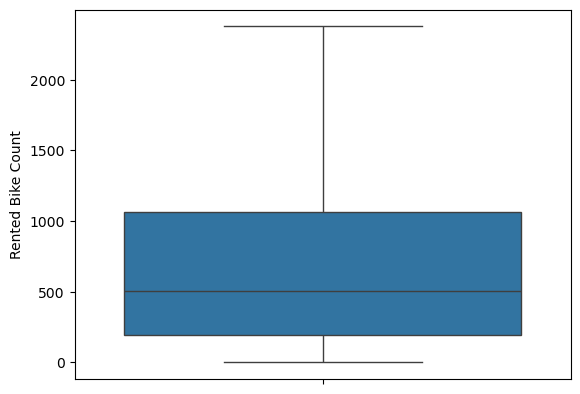

In [23]:
# Check outliers for Rented Bike Count alone after removing outliers

sns.boxplot(df1['Rented Bike Count'])

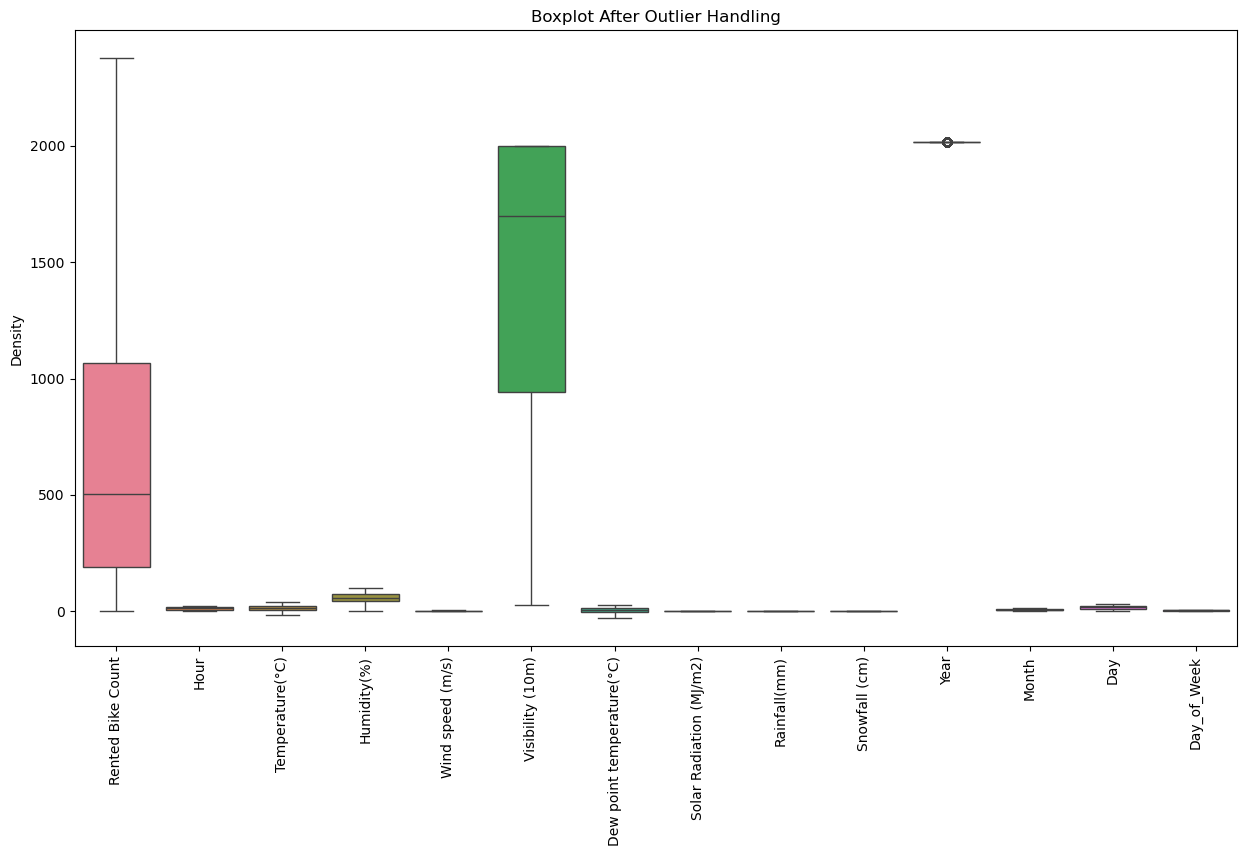

In [24]:
# Boxplot after removing outliers for all columns

plt.figure(figsize=(15,8))
sns.boxplot(data = df1)
plt.title("Boxplot After Outlier Handling")
plt.xticks(rotation=90)
plt.ylabel('Density')
plt.show()

In [25]:
# Address skewed data in numerical features through transformations.

Skewness: Skewness is a measure of the asymmetry of a dataset's distribution. It quantifies how much the data deviates from a symmetric, bell-shaped normal distribution.
Skewness = 0: Perfectly symmetric distribution.
Skewness > 0: Positively skewed (tail on the right).
Skewness < 0: Negatively skewed (tail on the left).
The further the skewness is from 0, the more pronounced the asymmetry.

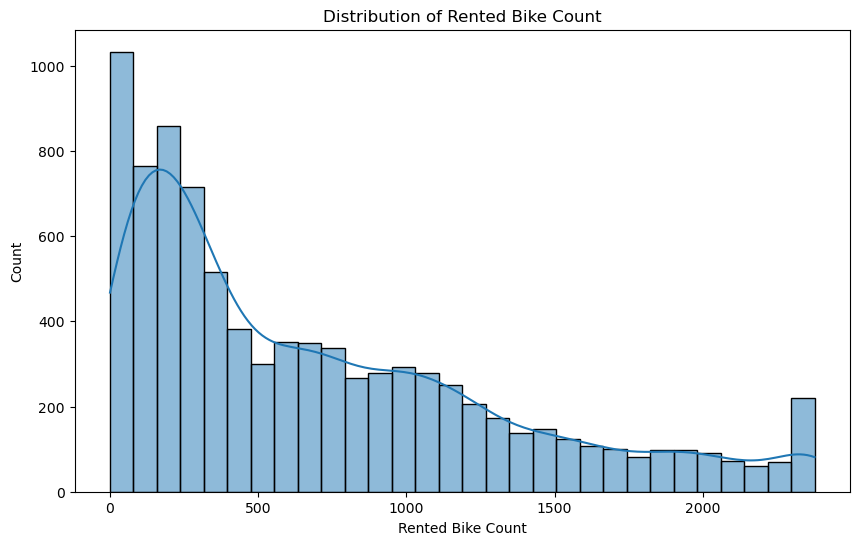

In [26]:
# Histogram Plot to visualize skewness in Rented Bike Count column

plt.figure(figsize=(10,6))
sns.histplot(df1['Rented Bike Count'], bins = 30, kde = True)
plt.title('Distribution of Rented Bike Count')  
plt.show()

In [27]:
# Check skewness of numerical features of df1

numerical_features = df1.select_dtypes(include=['number']).columns
print(df1[numerical_features].skew())

Rented Bike Count            1.003266
Hour                         0.000000
Temperature(°C)             -0.198326
Humidity(%)                  0.059579
Wind speed (m/s)             0.714700
Visibility (10m)            -0.701786
Dew point temperature(°C)   -0.367298
Solar Radiation (MJ/m2)      1.267346
Rainfall(mm)                 0.000000
Snowfall (cm)                0.000000
Year                        -2.978262
Month                       -0.010458
Day                          0.007522
Day_of_Week                 -0.003771
dtype: float64


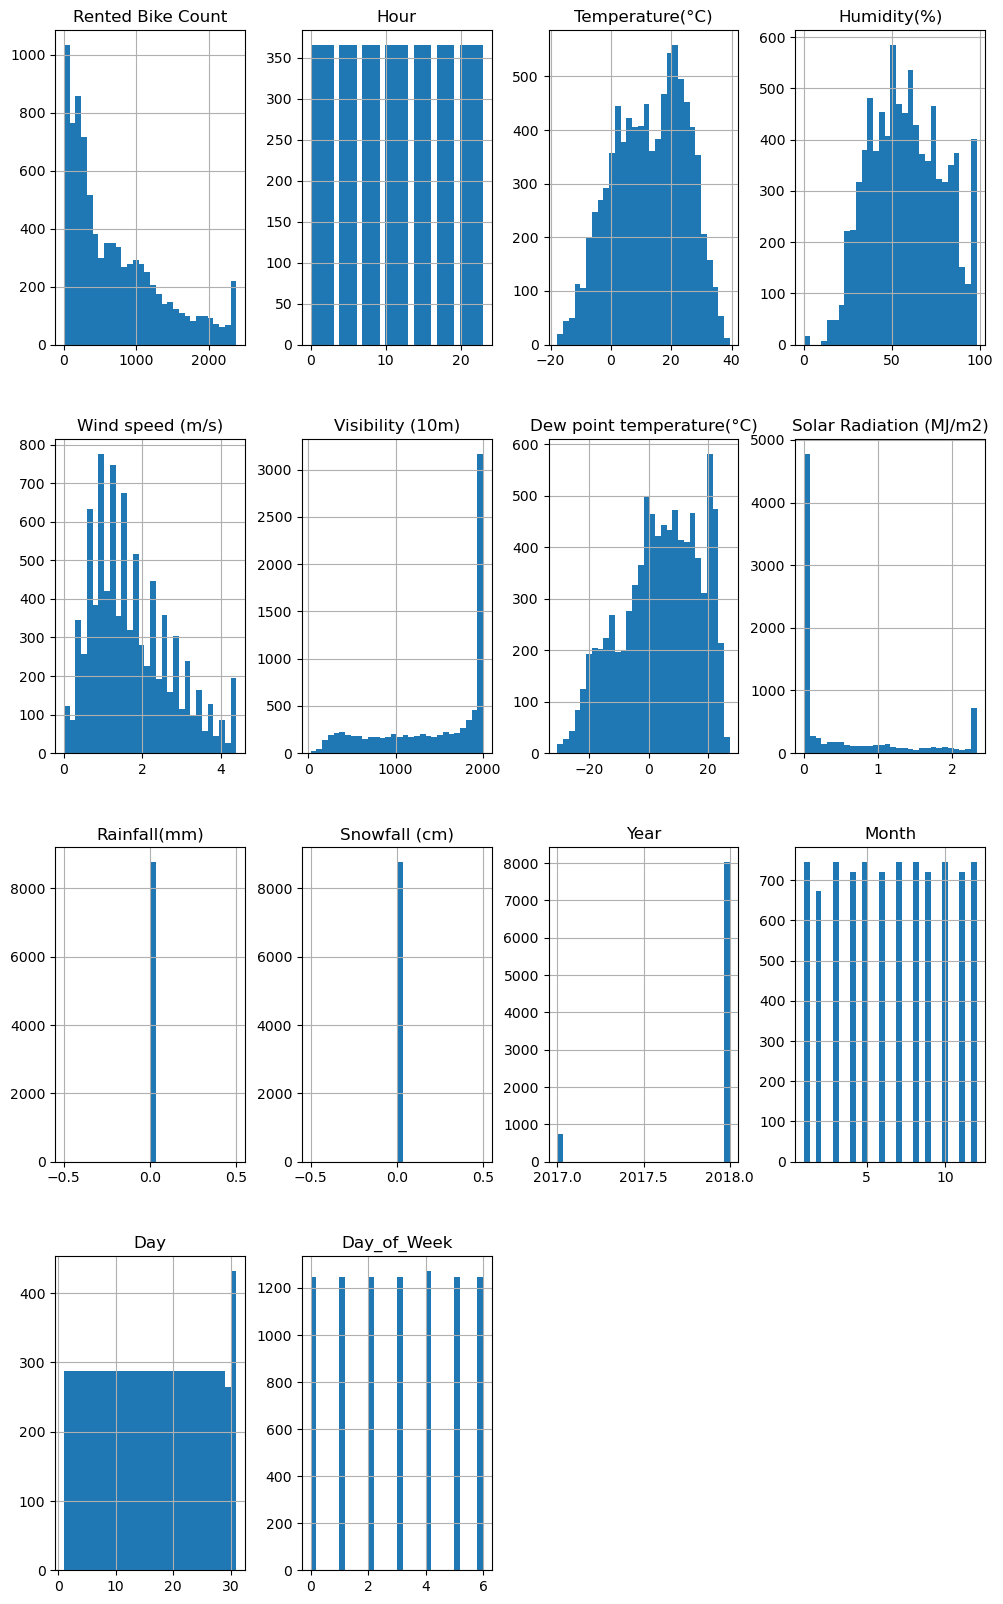

In [28]:
# Plot histograms before transforming features

df1.hist(figsize=(12, 20), bins=30)
plt.show()

In [29]:
# Check correlation of numerical columns
# Get numerical columns

df_num_cols = df1.select_dtypes(['number'])
df_num_cols.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Day_of_Week
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,12,1,4
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,12,1,4


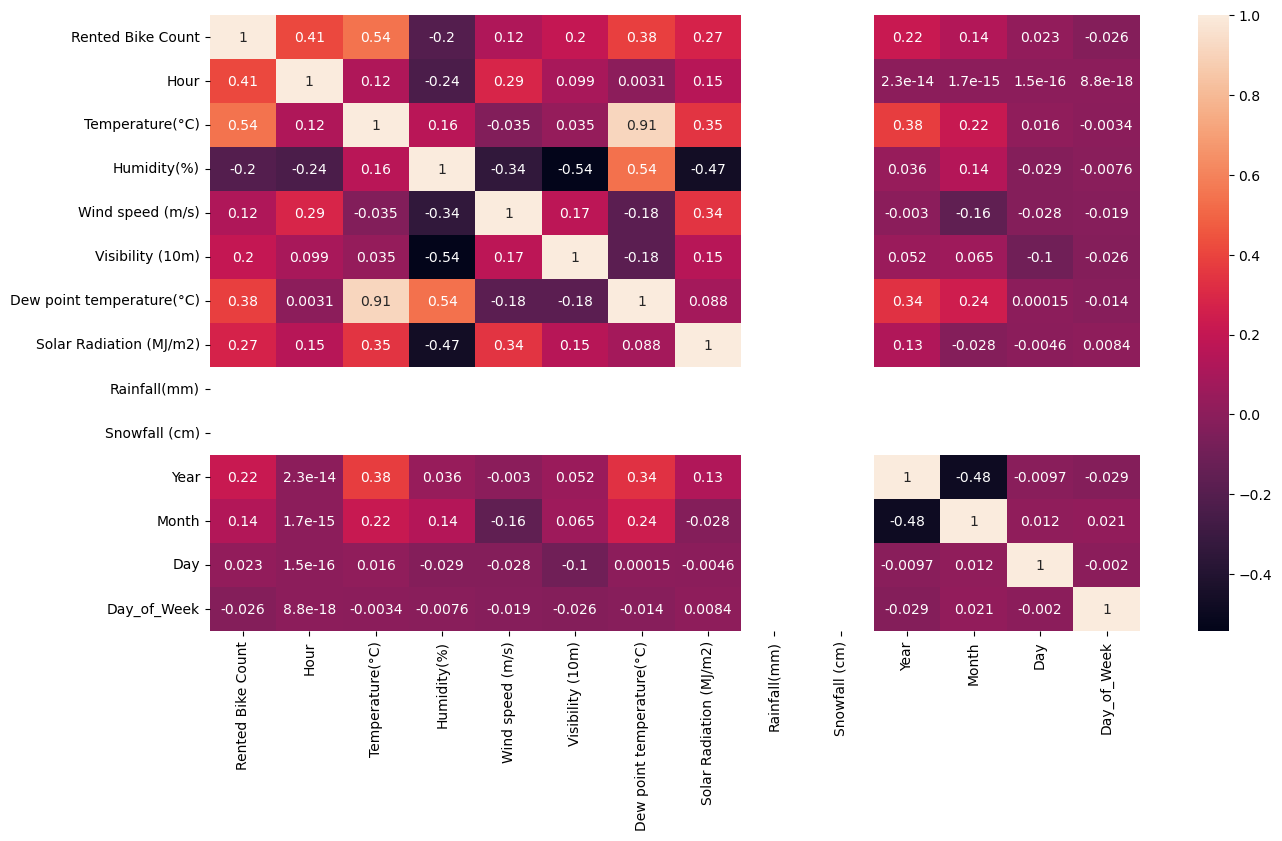

In [30]:
# Plot correlation

plt.figure(figsize = (15,8))
sns.heatmap(df_num_cols.corr(),annot = True)
plt.show()

In [31]:
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns

In [32]:
# Apply Yeo-Johnson transformation (works for both positive and negative skewness values)

# pt = PowerTransformer(method='yeo-johnson')
# df1[numerical_features] = pt.fit_transform(df1[numerical_features])
# print(df1[numerical_features].skew())

Here the 'Rented Bike Count' is '-0.140727' after the Yeo-Johnson transformation. If the target variable is expected to be non-negative (e.g., counts, prices), negative values would not make sense after the transformation.
So try with square root transformation method.

In [33]:
# Here all the features are less correlated, so can perform tranformation to all of them.
# Some features have negative corelation, maybe a chance of getting NULL values after transformation.
# Shift all values by adding a constant to make them positive, then apply the square root transformation.

In [34]:
# Shift data to make it positive.

df_shifted = df_num_cols + abs(df_num_cols.min()) + 1

# Apply square root transformation.

df_shifted_trans = np.sqrt(df_shifted)
print(df_shifted_trans.skew())

Rented Bike Count            0.210836
Hour                        -0.477833
Temperature(°C)             -0.656940
Humidity(%)                 -0.409036
Wind speed (m/s)             0.349200
Visibility (10m)            -0.998247
Dew point temperature(°C)   -0.819502
Solar Radiation (MJ/m2)      1.113144
Rainfall(mm)                 0.000000
Snowfall (cm)                0.000000
Year                        -2.978262
Month                       -0.287555
Day                         -0.375667
Day_of_Week                 -0.351075
dtype: float64


In [35]:
df_shifted_trans.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Day_of_Week
0,15.968719,1.000000,3.687818,6.164414,1.788854,45.033321,3.741657,1.0,1.0,1.0,63.52165,3.741657,1.732051,2.236068
1,14.317821,1.414214,3.646917,6.244998,1.341641,45.033321,3.741657,1.0,1.0,1.0,63.52165,3.741657,1.732051,2.236068
2,13.190906,1.732051,3.577709,6.324555,1.414214,45.033321,3.728270,1.0,1.0,1.0,63.52165,3.741657,1.732051,2.236068
3,10.392305,2.000000,3.549648,6.403124,1.378405,45.033321,3.741657,1.0,1.0,1.0,63.52165,3.741657,1.732051,2.236068
4,8.888194,2.236068,3.577709,6.082763,1.816590,45.033321,3.605551,1.0,1.0,1.0,63.52165,3.741657,1.732051,2.236068


In [36]:
df_shifted_trans.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Year                         0
Month                        0
Day                          0
Day_of_Week                  0
dtype: int64

In [37]:
df_shifted_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   float64
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   float64
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   float64
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Year                       8760 non-null   float64
 11  Month                      8760 non-null   float64
 12  Day                        8760 non-null   float64
 13  Day_of_Week                8760 non-null   float

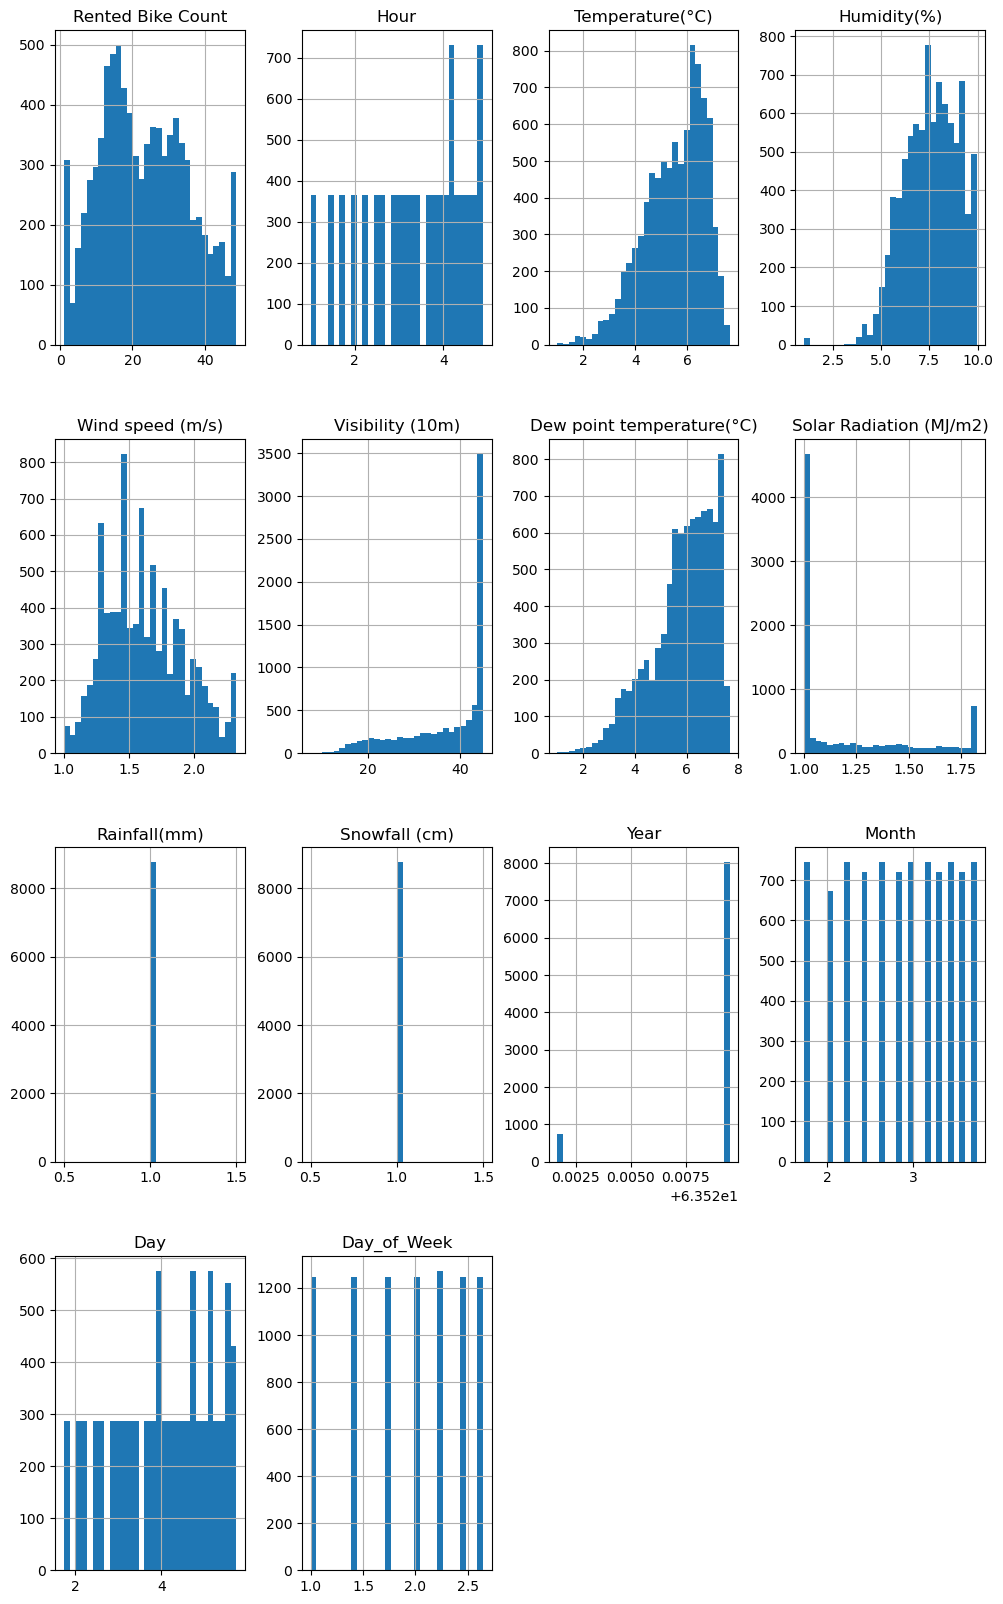

In [38]:
# Plot histograms after transforming features

df_shifted_trans.hist(figsize=(12, 20), bins=30)
plt.show()

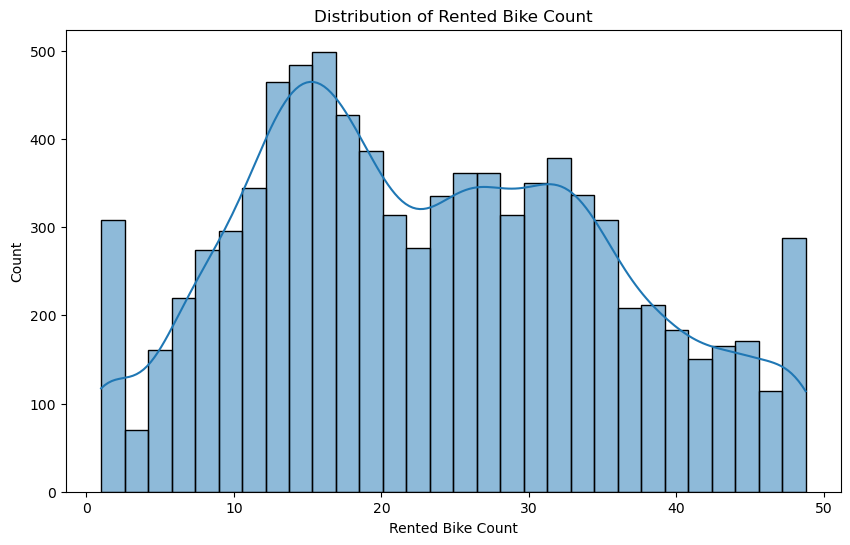

In [39]:
# Histogram Plot to visualize skewness in Rented Bike Count column after transformation

plt.figure(figsize=(10,6))
sns.histplot(df_shifted_trans['Rented Bike Count'], bins = 30, kde = True)
plt.title('Distribution of Rented Bike Count')  
plt.show()

### Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is an essential step in the data analysis process that involves 
investigating and visualizing the dataset to understand its structure, identify patterns, detect outliers, 
and check assumptions. The goal of EDA is to summarize the main characteristics of the data and 
uncover relationships, trends, and potential issues before applying more advanced techniques.

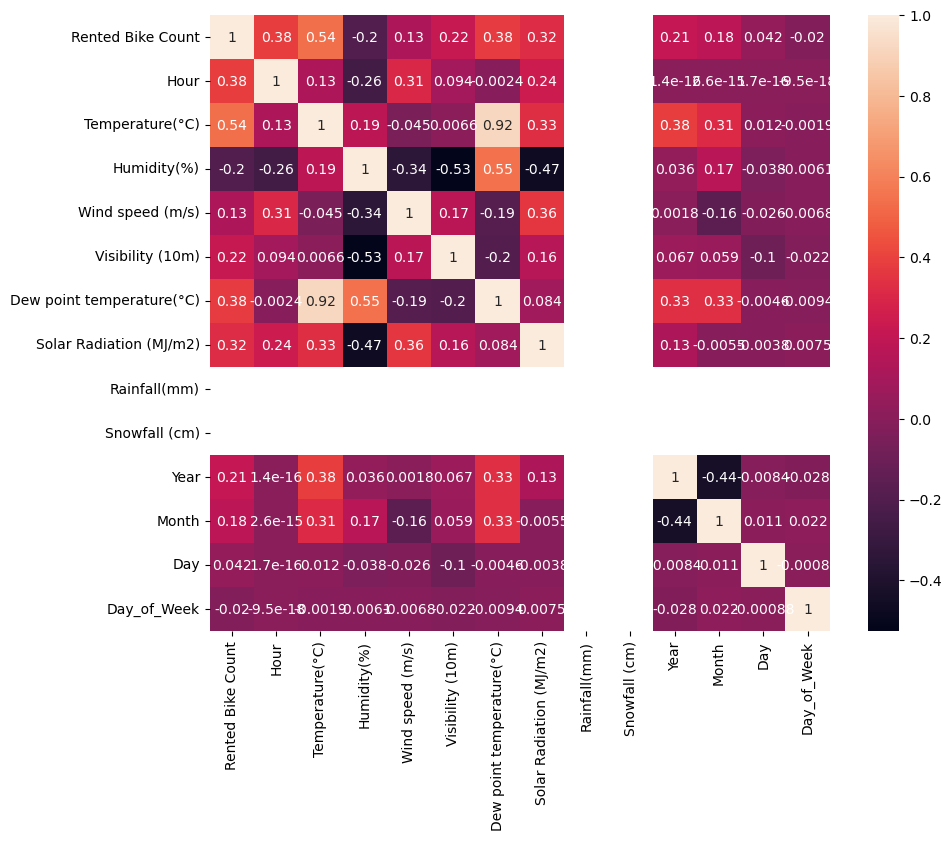

In [40]:
# Plot correlation after skewness transformation
# Columns from transformed data

plt.figure(figsize = (10,8))

sns.heatmap(df_shifted_trans.corr(),annot = True)
plt.show()

In [41]:
# Correlation and skewness improved slightly, another transformation may result to form NULL values.

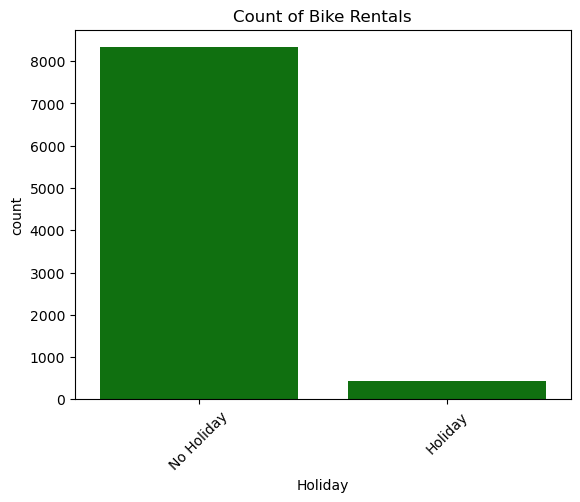

In [42]:
# Count of bike rentals in holidays and non holidays.

sns.countplot(x='Holiday', data=data, color = 'green')
plt.title('Count of Bike Rentals')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Rental Bike Distribution by Season')

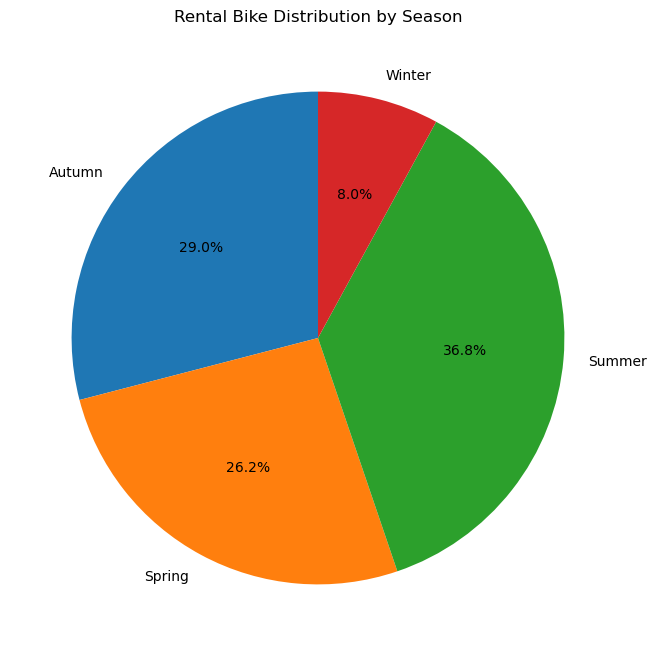

In [43]:
# Proportion of Rental Bikes in each seasons.

season_counts = df.groupby('Seasons')['Rented Bike Count'].sum()

# Create pie chart

plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Rental Bike Distribution by Season')

### Feature Engineering:

Feature Engineering is the process of transforming raw data into meaningful features that better represent the underlying patterns and relationships in the data. Effective feature engineering can improve the performance of machine learning models by making the data more suitable for the algorithms.

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

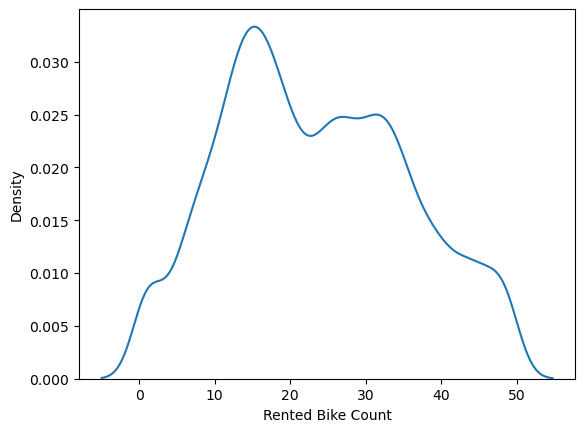

In [44]:
# Kernel Density Estimation (KDE) Plot

sns.kdeplot(df_shifted_trans['Rented Bike Count'])

In [45]:
# Encoding categorical features using OneHot Encoding
# Categorical columns

df_cat_cols = df1.select_dtypes(['object']) 
df_cat_cols.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


Encoding: Encoding refers to the process of converting categorical data into numerical values,
which is essential for machine learning algorithms that require numerical input. 
Categorical data, such as labels or categories, cannot be directly used in most machine learning models, 
so encoding is necessary to make this data usable.

In [46]:
# Onehot encoding

df_encode = pd.get_dummies(df_cat_cols)

One-Hot Encoding: One-Hot Encoding creates a binary column for each category in a categorical feature.
This technique increases the dimensionality of the data, which can lead to sparse matrices 
if there are many unique categories.

In [47]:
df_encode.head()

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,False,False,False,True,False,True,False,True
1,False,False,False,True,False,True,False,True
2,False,False,False,True,False,True,False,True
3,False,False,False,True,False,True,False,True
4,False,False,False,True,False,True,False,True


In [48]:
# Convert boolean to integers

df_encode = df_encode.astype(int)
df_encode.head()

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,1,0,1,0,1
3,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,1


In [49]:
# Concatenate Numerical column and Categorical column

In [50]:
df_data = pd.concat([df_shifted_trans, df_encode],axis = 1)

In [51]:
# First five rows of data after encoding and concatinating the numerical and categorical columns.

df_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Day,Day_of_Week,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,15.968719,1.000000,3.687818,6.164414,1.788854,45.033321,3.741657,1.0,1.0,1.0,...,1.732051,2.236068,0,0,0,1,0,1,0,1
1,14.317821,1.414214,3.646917,6.244998,1.341641,45.033321,3.741657,1.0,1.0,1.0,...,1.732051,2.236068,0,0,0,1,0,1,0,1
2,13.190906,1.732051,3.577709,6.324555,1.414214,45.033321,3.728270,1.0,1.0,1.0,...,1.732051,2.236068,0,0,0,1,0,1,0,1
3,10.392305,2.000000,3.549648,6.403124,1.378405,45.033321,3.741657,1.0,1.0,1.0,...,1.732051,2.236068,0,0,0,1,0,1,0,1
4,8.888194,2.236068,3.577709,6.082763,1.816590,45.033321,3.605551,1.0,1.0,1.0,...,1.732051,2.236068,0,0,0,1,0,1,0,1


### Feature Selection:

Feature Selection: Feature Selection is the process of identifying and selecting the most important features (or variables) 
for use in model building. This process helps improve the performance of machine learning models by 
reducing overfitting, improving accuracy, and reducing training time.

In [52]:
# Use Select K Best algorithm to identify relevant features
# For this, need to split X and y features
# Feature Selection

X = df_data.drop('Rented Bike Count', axis=1)
y = df_data['Rented Bike Count']

In [53]:
# All columns in the dataset

X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year',
       'Month', 'Day', 'Day_of_Week', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes'],
      dtype='object')

In [54]:
print(y)

0       15.968719
1       14.317821
2       13.190906
3       10.392305
4        8.888194
          ...    
8755    31.685959
8756    27.658633
8757    26.362853
8758    26.702060
8759    24.186773
Name: Rented Bike Count, Length: 8760, dtype: float64


In [55]:
# Feature selection using SelectKBest, f_regression
# Applying F_Regression for feature selection

selector = SelectKBest(score_func=f_regression, k=15)   #Select top 15 features
X_kbest = selector.fit_transform(X, y)

SelectKBest: SelectKBest is a feature selection method provided by sklearn that selects the top k features 
based on a statistical test. This method can be used with various scoring functions to evaluate 
the importance of each feature in relation to the target variable.

f_regression: f_regression is a statistical test used in feature selection for regression problems. It measures the linear relationship between each feature and the target variable using the ANOVA F-statistic. The F-statistic is used to compare the variances between the groups and assess whether the feature is significantly related to the target variable.

In feature selection, f_regression helps determine which features have the strongest linear relationship with the target variable, which can then be used to select the most important features for a regression model.

In [56]:
# Get selected features name and score

selected_features_kbest = X.columns[selector.get_support()]  

# Get columns in selector from whole x columns, get_support checks the availability of each feature in 'X' with the 'selector'(boolean) 

all_feature_scores = pd.DataFrame({'All Features':X.columns, 'Scores':selector.scores_}).sort_values(by='Scores', ascending = False)

print("Selected Features:",selected_features_kbest)
print(all_feature_scores)

Selected Features: Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Year', 'Month', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning Day_No', 'Functioning Day_Yes'],
      dtype='object')
                 All Features       Scores
1             Temperature(°C)  3546.154321
16             Seasons_Winter  2009.377745
0                        Hour  1507.143247
5   Dew point temperature(°C)  1473.796321
19         Functioning Day_No  1161.834583
20        Functioning Day_Yes  1161.834583
6     Solar Radiation (MJ/m2)  1002.176827
15             Seasons_Summer   940.421574
4            Visibility (10m)   445.058303
9                        Year   408.676613
2                 Humidity(%)   381.367292
10                      Month   290.198938
3            Wind speed (m/s)   148.156929
17            Holiday_Holiday    65.414134
1

In [57]:
X[selected_features_kbest].head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Year,Month,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,1.000000,3.687818,6.164414,1.788854,45.033321,3.741657,1.0,63.52165,3.741657,0,1,0,1,0,1
1,1.414214,3.646917,6.244998,1.341641,45.033321,3.741657,1.0,63.52165,3.741657,0,1,0,1,0,1
2,1.732051,3.577709,6.324555,1.414214,45.033321,3.728270,1.0,63.52165,3.741657,0,1,0,1,0,1
3,2.000000,3.549648,6.403124,1.378405,45.033321,3.741657,1.0,63.52165,3.741657,0,1,0,1,0,1
4,2.236068,3.577709,6.082763,1.816590,45.033321,3.605551,1.0,63.52165,3.741657,0,1,0,1,0,1


### Split Data into Training and Testing Sets:

Split Data: Splitting the data into training and testing sets is a crucial step in machine learning. It allows to train the model on one portion of the data (the training set) and evaluate its performance on another portion (the testing set). This helps ensure that the model generalizes well to new, unseen data and prevents overfitting.

In [58]:
# Split the selected data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X[selected_features_kbest], y, test_size = 0.2, random_state = 42)

In [59]:
# Output the shapes of the new training and testing sets

print("Training set shape (features):", X_train.shape) 
print("Testing set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Testing set shape (target):",y_test.shape)

Training set shape (features): (7008, 15)
Testing set shape (features): (1752, 15)
Training set shape (target): (7008,)
Testing set shape (target): (1752,)


### Feature Scaling:

Feature scaling is the process of standardizing or normalizing the range of independent 
variables (features) in a dataset. It's an important step in data preprocessing, especially when 
using machine learning algorithms that rely on the distance between data points or assume 
that the features have similar scales.

Scale numerical features if necessary to ensure uniform magnitude using techniques like
Min-Max scaling or Standardization

In [60]:
# Standard Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

The StandardScaler is a feature scaling technique provided by sklearn.preprocessing that standardizes the features by removing the mean and scaling them to unit variance (standard deviation of 1). This process is also known as Z-score normalization.

Standardization transforms the data to have a mean of 0 and a standard deviation of 1.
The formula for standardization is: 𝑋scaled = (𝑋 − 𝜇) / 𝜎
 
where:
X is the original value of the feature,
μ is the mean of the feature,
σ is the standard deviation of the feature.

In [61]:
# Convert back to DataFrame for easier handling

X_normalized_df = pd.DataFrame(X_train_scaled, columns=selected_features_kbest)
print(X_normalized_df.head())

       Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  0.580855         0.123327     0.220467          1.973016         -1.047084   
1 -0.182154         0.822186     1.264928          0.069486         -1.426003   
2  1.010883        -0.033454    -0.511369         -0.244109         -0.766828   
3  1.399658        -1.301039     0.574467          0.366092          0.119978   
4  1.305709         1.105654     0.743870         -0.137506         -0.532410   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)      Year     Month  \
0                   0.218227                 0.751754  0.301793  1.216644   
1                   1.131152                 0.411366  0.301793 -0.037817   
2                  -0.193563                -0.721693  0.301793  1.216644   
3                  -0.787053                -0.721693  0.301793 -1.375092   
4                   1.217205                -0.721693  0.301793  0.239142   

   Seasons_Summer  Seasons_Winter  Holiday_Holiday

### Build the ML Model:

In [62]:
# Model Building

models={
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regression' : DecisionTreeRegressor(),
    '3. Random Forest Regression' : RandomForestRegressor(),
    '4. Gradient Boosting Regression' : GradientBoostingRegressor(),
    '5. Support Vector Regression' : SVR(),
}

1. Linear Regression: It models the relationship between a dependent variable (target) and one or more
   independent variables (features) by fitting a linear equation to the observed data.
   y=β
 + 
β

   ​
 X
   here:

Y is the dependent    variable
X is the independent    variable
β0 is the    intercept
β1 is the slope

2. Decision Tree Regression: It is a non-linear regression model that uses a decision tree structure to
   model the relationship between the features and the target variable.  A decision tree is a
   flowchart-like tree structure where each internal node represents a decision based on a feature,
   and each leaf node represents the predicted value (the target variable).

3. Random Forest Regression: It is an ensemble learning method that combines multiple decision trees
   to improve the accuracy and    robustness of predictions. Unlike a single decision tree,
   which can be prone to overfitting, a random forest uses a collection of decision trees
   to make predictions and averages their outputs, resulting in more accurate and stable predictions.

4. Gradient Boosting Regression: It is an ensemble machine learning technique that builds a model by
   combining the predictions of several weaker models (typically decision trees) in a sequential manner.
   Unlike Random Forest, which builds trees independently, Gradient Boosting builds trees sequentially,
   where each tree tries to correct the errors made by the previous one. This technique is highly
   effective for regression tasks, especially when dealing with complex datasets.

5. Support Vector Regression: It is a type of Support Vector Machine (SVM) used for regression tasks.
   Unlike traditional regression models that aim to minimize the error in predictions,
   SVR tries to fit the best line (or hyperplane in higher dimensions) within a specified margin
   while allowing some errors (as long as they are within a certain threshold). It is particularly effective
   when the relationship between the features and the target variable is non-linear.

In [63]:
# Applying each model

results={} # use to store evaluation result

for model_name, model in models.items():
    
    # fit the model
    
    model.fit(X_train_scaled, y_train)
    
    # make the prediction
    
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the results
    
    results[model_name] = {'MSE' : mse, 'MAE' : mae, 'R2' : r2, 'RMSE' : rmse}

MSE: Mean Squared Error represents the average of the squared difference between the original and predicted 
     values in the data set. It measures the variance of the residuals.

MAE: The Mean absolute error represents the average of the absolute difference between the actual and 
     predicted values in the dataset. It measures the average of the residuals in the dataset.

R2 Score: The coefficient of determination or R-squared represents the proportion of the variance in 
          the dependent variable which is explained by the linear regression model. It is a scale-free score 
          i.e. irrespective of the values being small or large, the value of R square will be less than one.

RMSE: The Root Mean Squared Error is the square root of Mean Squared error. 
      It measures the standard deviation of residuals.

### Model Evaluation:

In [64]:
results_df = pd.DataFrame(results).T
print(results_df)

                                       MSE       MAE        R2      RMSE
1. Linear Regression             58.260680  5.870395  0.608689  7.632868
2. Decision Tree Regression      39.995027  4.082868  0.731371  6.324162
3. Random Forest Regression      18.428351  2.847886  0.876225  4.292826
4. Gradient Boosting Regression  22.564166  3.377278  0.848447  4.750175
5. Support Vector Regression     39.911028  4.395668  0.731935  6.317518


Model evaluation: It is the process of assessing the performance of a machine learning model using various 
metrics and techniques. The goal is to determine how well the model generalizes to unseen data and whether 
it can make accurate predictions. Model evaluation is critical to ensure that the model is not overfitting 
or underfitting the training data and is capable of making reliable predictions on new data.

##### Best Model:

In [65]:
# Print results.

print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: R2_Score = {metrics['R2']:.4f}")

Model Performance:
1. Linear Regression: R2_Score = 0.6087
2. Decision Tree Regression: R2_Score = 0.7314
3. Random Forest Regression: R2_Score = 0.8762
4. Gradient Boosting Regression: R2_Score = 0.8484
5. Support Vector Regression: R2_Score = 0.7319


In [66]:
# Finding the best model among these models.

best_model = results_df['R2'].idxmax()
print("The best regression model is:",best_model)

The best regression model is: 3. Random Forest Regression


### Hyperparameter Tuning:

In [67]:
# Optimize model performance by tuning hyperparameters.
# Hyperparameter tuning for Random Forest Regression.
# Define the parameter grid for Grid Search.

param_grid = {
    'n_estimators': [50, 100],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf' : [1, 2]
}

Hyperparameter tuning: It is the process of finding the best set of hyperparameters for a machine learning 
model to improve its performance. Hyperparameters are parameters that are set before the learning process 
begins and are not updated during training (unlike model parameters). The goal of hyperparameter tuning 
is to identify the optimal combination of hyperparameters that leads to the best model performance.

In [68]:
# GridSearchCV algorithm for hyperparameter tuning

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs= -1)

Grid Search: It is a hyperparameter tuning technique used to exhaustively search through a specified 
set of hyperparameters for a machine learning model. The goal is to find the best combination of 
hyperparameters that gives the best model performance. Grid search performs a cross-validated search 
over a grid of hyperparameters, testing all possible combinations.

In [69]:
# Fit the Grid Search to the Data

grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters : {best_params}")
print(f"Best Score : {best_score}")

Best Parameters : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score : -18.131854367153203


In [70]:
# Evaluate the best model
# Train the best model from Grid Search on the entire training data

best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on the test data

y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE : {test_mse}")
print(f"Test MAE : {test_mae}")
print(f"Test RMSE : {test_rmse}")
print(f"Test R2 : {test_r2}")

Test MSE : 23.054385566172076
Test MAE : 3.5008318258501103
Test RMSE : 4.801498262643867
Test R2 : 0.8451539288982959


### Build Pipeline:

In [71]:
# Create the pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('model', RandomForestRegressor())           # Random Forest Regressor
])
# Train the pipeline

pipeline.fit(X_train, y_train)
# Predict on test data

y_pred = pipeline.predict(X_test)

Pipeline: A Pipeline in machine learning is a way to streamline and automate the workflow of a 
machine learning project. It helps organize and manage different steps in the machine learning process, 
such as data preprocessing, feature engineering, model training, and evaluation. A pipeline ensures that 
all steps are performed in the correct order and that the workflow is repeatable and consistent.

In [72]:
# Saving pipeline model

joblib.dump(pipeline,'Bike_Rental_Pipeline_RF.joblib')

['Bike_Rental_Pipeline_RF.joblib']

### Test the model with Unseen data

In [73]:
# Create unseen data randomly from selected features

unseen_random_rows = X[selected_features_kbest].sample(n=10, random_state=42)

In [74]:
unseen_random_rows

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Year,Month,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
6056,3.000000,6.782330,8.366600,1.673320,45.022217,7.252586,1.303840,63.529521,3.162278,1,0,0,1,0,1
5556,3.605551,7.169379,7.211103,1.760682,28.774989,7.259477,1.823458,63.529521,3.000000,1,0,0,1,0,1
5990,3.872983,7.266361,7.141428,1.483240,42.095130,7.328028,1.637071,63.529521,3.162278,1,0,0,1,0,1
7674,4.358899,5.974948,6.928203,1.549193,40.804412,6.090977,1.053565,63.529521,3.464102,0,0,0,1,0,1
3319,2.828427,5.019960,7.211103,1.414214,37.762415,5.347897,1.090871,63.529521,2.449490,0,0,0,1,0,1
5761,1.414214,6.841053,8.485281,1.264911,42.743421,7.334848,1.000000,63.529521,3.000000,1,0,0,1,0,1
5972,4.582576,7.078135,8.124038,1.732051,40.174619,7.449832,1.009950,63.529521,3.162278,1,0,0,1,0,1
8758,4.795832,4.571652,6.480741,1.414214,43.439613,4.669047,1.000000,63.529521,3.605551,0,0,0,1,0,1
6079,2.828427,6.745369,8.246211,1.341641,45.033321,7.183314,1.063015,63.529521,3.162278,1,0,0,1,0,1
7177,1.414214,5.949790,7.348469,1.643168,45.033321,6.204837,1.000000,63.529521,3.316625,0,0,0,1,0,1


In [75]:
# Save the unseen data as a csv file.

joblib.dump(unseen_random_rows, 'bike_rental_unseen_data.csv')

['bike_rental_unseen_data.csv']

In [76]:
# Load The saved Pipeline and Unseen data.

loaded_pipeline = joblib.load('Bike_Rental_Pipeline_RF.joblib')
loaded_unseen_data = joblib.load('bike_rental_unseen_data.csv')

In [77]:
# Prediction using pipeline.

predictions = pipeline.predict(loaded_unseen_data)

In [78]:
# Store the unseen_random_rows to predicted_unseen_data to add predictions.

predicted_unseen_data = unseen_random_rows  

In [79]:
# Add a column in unseen_random_rows to store the predicted values.

predicted_unseen_data['Bike_Rental_Predictions'] = predictions
predicted_unseen_data

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Year,Month,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Bike_Rental_Predictions
6056,3.000000,6.782330,8.366600,1.673320,45.022217,7.252586,1.303840,63.529521,3.162278,1,0,0,1,0,1,37.983803
5556,3.605551,7.169379,7.211103,1.760682,28.774989,7.259477,1.823458,63.529521,3.000000,1,0,0,1,0,1,26.774327
5990,3.872983,7.266361,7.141428,1.483240,42.095130,7.328028,1.637071,63.529521,3.162278,1,0,0,1,0,1,26.296436
7674,4.358899,5.974948,6.928203,1.549193,40.804412,6.090977,1.053565,63.529521,3.464102,0,0,0,1,0,1,44.158873
3319,2.828427,5.019960,7.211103,1.414214,37.762415,5.347897,1.090871,63.529521,2.449490,0,0,0,1,0,1,22.196992
5761,1.414214,6.841053,8.485281,1.264911,42.743421,7.334848,1.000000,63.529521,3.000000,1,0,0,1,0,1,27.188195
5972,4.582576,7.078135,8.124038,1.732051,40.174619,7.449832,1.009950,63.529521,3.162278,1,0,0,1,0,1,39.064095
8758,4.795832,4.571652,6.480741,1.414214,43.439613,4.669047,1.000000,63.529521,3.605551,0,0,0,1,0,1,27.394023
6079,2.828427,6.745369,8.246211,1.341641,45.033321,7.183314,1.063015,63.529521,3.162278,1,0,0,1,0,1,31.530622
7177,1.414214,5.949790,7.348469,1.643168,45.033321,6.204837,1.000000,63.529521,3.316625,0,0,0,1,0,1,20.981931


In [80]:
print(predicted_unseen_data['Bike_Rental_Predictions'])


6056    37.983803
5556    26.774327
5990    26.296436
7674    44.158873
3319    22.196992
5761    27.188195
5972    39.064095
8758    27.394023
6079    31.530622
7177    20.981931
Name: Bike_Rental_Predictions, dtype: float64


In [81]:
# Test with bottom 10 data samples

new_unseen_data = X_train.tail(10)

In [82]:
new_unseen_data

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Year,Month,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
8322,4.358899,5.422177,6.782330,1.673320,44.317040,5.549775,1.004988,63.529521,3.605551,0,0,0,1,0,1
5578,3.316625,7.085196,7.211103,1.449138,29.580399,7.183314,1.822087,63.529521,3.000000,1,0,0,1,0,1
4426,3.316625,6.603030,5.916080,1.516575,43.554563,6.276942,1.757840,63.529521,2.828427,1,0,0,1,0,1
466,3.316625,3.660601,7.549834,1.449138,42.178193,4.335897,1.131371,63.521650,3.741657,0,1,0,1,0,1
6265,1.414214,6.618157,7.615773,1.378405,45.033321,6.884766,1.000000,63.529521,3.162278,1,0,0,1,0,1
5734,4.795832,6.978539,8.660254,1.732051,35.057096,7.503333,1.000000,63.529521,3.000000,1,0,0,1,0,1
5191,2.828427,6.503845,9.539392,1.224745,21.748563,7.300685,1.024695,63.529521,3.000000,1,0,0,1,0,1
5390,3.872983,6.949820,7.937254,1.923538,44.373415,7.280110,1.670329,63.529521,3.000000,1,0,0,1,0,1
860,4.582576,3.924283,7.211103,1.449138,37.669616,4.415880,1.000000,63.529521,1.732051,0,1,0,1,0,1
7270,4.795832,6.172520,7.483315,1.224745,45.033321,6.449806,1.000000,63.529521,3.316625,0,0,0,1,0,1


In [83]:
y_train_actual = y_train.tail(10)

In [84]:
y_train_actual

8322    44.977772
5578    26.457513
4426    30.643107
466     12.767145
6265    29.068884
5734    38.832976
5191    28.792360
5390    31.622777
860     17.972201
7270    38.755645
Name: Rented Bike Count, dtype: float64

In [85]:
# Save the unseen data as a csv file.

joblib.dump(new_unseen_data, 'new_bike_rental_unseen_data.csv')

['new_bike_rental_unseen_data.csv']

In [86]:
# Load The saved Pipeline and Unseen data.

new_loaded_pipeline = joblib.load('Bike_Rental_Pipeline_RF.joblib')
new_loaded_unseen_data = joblib.load('new_bike_rental_unseen_data.csv')

In [87]:
# Prediction using pipeline.

new_predictions = pipeline.predict(new_loaded_unseen_data)

In [88]:
# Store the new_unseen_data to new_predicted_unseen_data to add predictions.

new_predicted_unseen_data = new_unseen_data  

In [89]:
new_predicted_unseen_data['Bike_Rental_Predictions'] = new_predictions
new_predicted_unseen_data

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Year,Month,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Bike_Rental_Predictions
8322,4.358899,5.422177,6.782330,1.673320,44.317040,5.549775,1.004988,63.529521,3.605551,0,0,0,1,0,1,43.884421
5578,3.316625,7.085196,7.211103,1.449138,29.580399,7.183314,1.822087,63.529521,3.000000,1,0,0,1,0,1,26.423654
4426,3.316625,6.603030,5.916080,1.516575,43.554563,6.276942,1.757840,63.529521,2.828427,1,0,0,1,0,1,31.234619
466,3.316625,3.660601,7.549834,1.449138,42.178193,4.335897,1.131371,63.521650,3.741657,0,1,0,1,0,1,13.738331
6265,1.414214,6.618157,7.615773,1.378405,45.033321,6.884766,1.000000,63.529521,3.162278,1,0,0,1,0,1,27.958270
5734,4.795832,6.978539,8.660254,1.732051,35.057096,7.503333,1.000000,63.529521,3.000000,1,0,0,1,0,1,39.372318
5191,2.828427,6.503845,9.539392,1.224745,21.748563,7.300685,1.024695,63.529521,3.000000,1,0,0,1,0,1,25.994026
5390,3.872983,6.949820,7.937254,1.923538,44.373415,7.280110,1.670329,63.529521,3.000000,1,0,0,1,0,1,31.606219
860,4.582576,3.924283,7.211103,1.449138,37.669616,4.415880,1.000000,63.529521,1.732051,0,1,0,1,0,1,17.231423
7270,4.795832,6.172520,7.483315,1.224745,45.033321,6.449806,1.000000,63.529521,3.316625,0,0,0,1,0,1,39.274019


In [90]:
actual_vs_pred = pd.DataFrame([y_train_actual, new_predicted_unseen_data['Bike_Rental_Predictions']]).T

In [91]:
print(actual_vs_pred)

      Rented Bike Count  Bike_Rental_Predictions
8322          44.977772                43.884421
5578          26.457513                26.423654
4426          30.643107                31.234619
466           12.767145                13.738331
6265          29.068884                27.958270
5734          38.832976                39.372318
5191          28.792360                25.994026
5390          31.622777                31.606219
860           17.972201                17.231423
7270          38.755645                39.274019


### Evaluate the Unseen data

In [92]:
# Evaluate the model with unseen data.

unseen_mse = mean_squared_error(y_train_actual, new_predicted_unseen_data['Bike_Rental_Predictions'])
unseen_mae = mean_absolute_error(y_train_actual, new_predicted_unseen_data['Bike_Rental_Predictions'])
unseen_rmse = np.sqrt(unseen_mse)
unseen_r2 = r2_score(y_train_actual, new_predicted_unseen_data['Bike_Rental_Predictions'])

print("The scores of predicted values of unseen data are:\n")
print(f"Unseen MSE : {unseen_mse}")
print(f"Unseen MAE : {unseen_mae}")
print(f"Unseen RMSE : {unseen_rmse}")
print(f"Unseen R2 : {unseen_r2}")

The scores of predicted values of unseen data are:

Unseen MSE : 1.2662413574145668
Unseen MAE : 0.8413907236697582
Unseen RMSE : 1.1252739032851364
Unseen R2 : 0.9849001010173001


### Conclusion:

The comparison between the actual rented bike counts and the predicted values indicates that the model performs reasonably well in predicting bike rentals. Although there are a few instances where the predictions deviate slightly from the actual values, the model maintains a consistent level of accuracy across different ranges of the target variable, demonstrating good generalization. This model could be valuable for planning and decision-making in bike rental operations. For example, it can assist in resource allocation and demand forecasting effectively.